In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

C:\Users\hp\anaconda3\envs\dlc_py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


TensorFlow version: 2.11.0


In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize and flatten
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

Train shape: (60000, 784) Test shape: (10000, 784)


In [3]:
encoding_dim = 64  # compressed representation size

input_img = keras.Input(shape=(784,))
# Encoder
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# Decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
235/235 [==============================] - 6s 15ms/step - loss: 0.2207 - accuracy: 0.0109 - val_loss: 0.1405 - val_accuracy: 0.0108
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1226 - accuracy: 0.0109 - val_loss: 0.1099 - val_accuracy: 0.0108
Epoch 3/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1062 - accuracy: 0.0110 - val_loss: 0.1005 - val_accuracy: 0.0115
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0991 - accuracy: 0.0115 - val_loss: 0.0955 - val_accuracy: 0.0131
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0948 - accuracy: 0.0118 - val_loss: 0.0920 - val_accuracy: 0.0137
Epoch 6/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0917 - accuracy: 0.0120 - val_loss: 0.0891 - val_accuracy: 0.0126
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0891 - accuracy: 0.0132 - val_loss: 0.0869 - val_accuracy: 0.0143

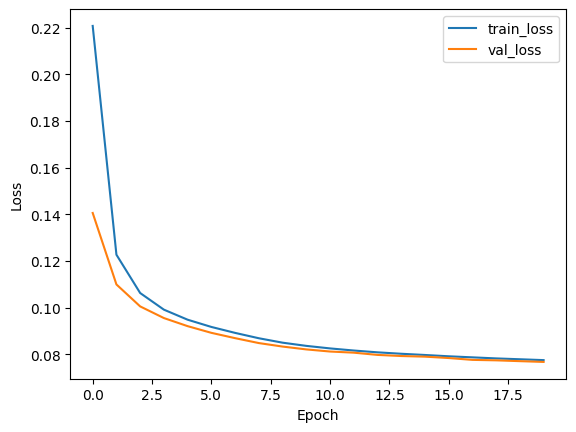

In [5]:
history = autoencoder.fit(
    x_train, x_train,  # target is the same as input
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Plot training loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step
Reconstruction MSE: 0.005058
Reconstruction Accuracy (thresholded): 0.9809


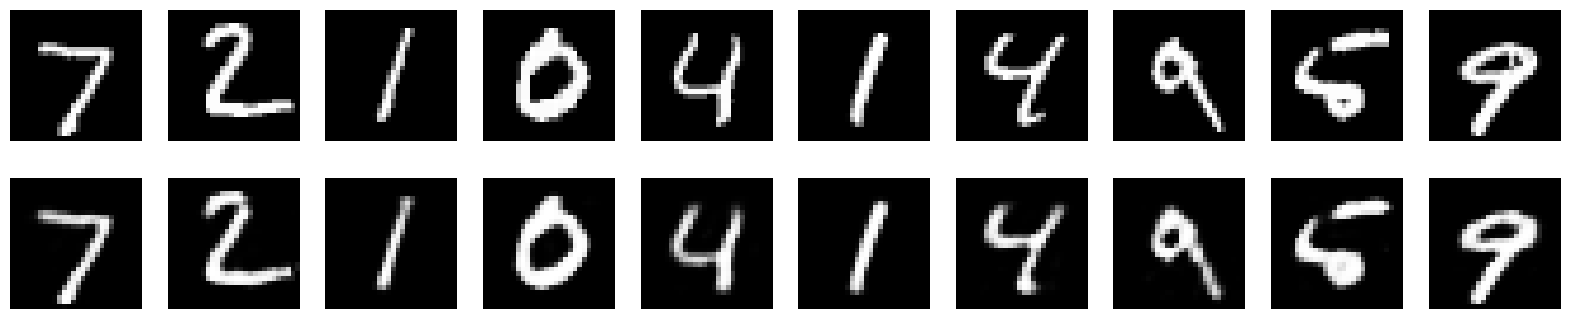

In [6]:
decoded_imgs = autoencoder.predict(x_test)

# Calculate Mean Squared Error as reconstruction performance metric
mse = np.mean(np.square(x_test - decoded_imgs))
print(f"Reconstruction MSE: {mse:.6f}")

# (Optional) Calculate average accuracy on reconstructed vs original binary thresholded images
x_test_bin = (x_test > 0.5).astype(int)
decoded_bin = (decoded_imgs > 0.5).astype(int)
accuracy = np.mean(x_test_bin == decoded_bin)
print(f"Reconstruction Accuracy (thresholded): {accuracy:.4f}")

# Visualize Original vs Reconstructed Images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()